In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df_hitter = pd.read_csv('/Users/christopher/Desktop/Springboard-/df_hitter_v3.csv')

In [3]:
df_hitter.head()

,playerName,salary,adj_salary_filled,flag,Age,HT,WT,Bats,Throws,posit,...,SF,HBP,GDP,Bavg,Slg,obp,OPS,year,total_years_mlb,minimum_year
0,AJ Ellis,NaN,468974.9,1,29,6-3,240,R,R,C,...,1,1,5,0.278,0.324,0.363,0.687,2010,3,400000
1,AJ Ellis,421000.0,478492.4,0,30,6-3,240,R,R,c,...,0,3,2,0.271,0.376,0.392,0.768,2011,4,414000
2,AJ Ellis,490000.0,545623.7,0,31,6-3,240,R,R,C,...,4,7,17,0.270,0.414,0.373,0.787,2012,5,480000
3,AJ Ellis,2000000.0,2194885.8,0,32,6-3,240,R,R,C,...,6,3,11,0.238,0.364,0.318,0.682,2013,6,480000
4,AJ Ellis,3550000.0,3833731.9,0,33,6-3,240,R,R,C,...,4,4,15,0.191,0.254,0.323,0.577,2014,7,480000


## Baseline Regression Model

In [4]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# drop irrelevant columns
df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)

# convert categorical features
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)


# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y
X = pd.concat([X_, dummies], axis=1)
y = df_hitter_finall.adj_salary_filled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale dataset
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

# Create a dummy regressor
dummy_mean = DummyRegressor(strategy='mean')

# "Train" dummy regressor
dummy_mean.fit(X_train_scaled, y_train)

y_pred = dummy_mean.predict(X_test_scaled)
print('R-squared:', r2_score(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

R-squared: -0.001034351057409566
RMSE: 5397560.686014471


## Linear Regression Model basic

In [5]:
from sklearn.metrics import r2_score


df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)

# convert categorical features
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)


# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y
X = pd.concat([X_, dummies], axis=1)
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
pred = linreg.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test, pred)
print(rmse, r2)

928216264.1913681 -5.5429438498412544e+17


## Transformed TargetRegressor

In [6]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)
# convert categorical features
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)



# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y 
X = pd.concat([X_, dummies], axis=1)
y = df_hitter_finall.adj_salary_filled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

regr_trans = TransformedTargetRegressor(regressor=LinearRegression(),
                                        func=np.log1p,
                                        inverse_func=np.expm1)
regr_trans.fit(X_train_scaled, y_train)
y_pred = regr_trans.predict(X_test_scaled)
y_pred_train = regr_trans.predict(X_train_scaled)

print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

#check predictions
results = pd.DataFrame()
results['y_pred'] = list(np.exp(pred))
results['y_test'] = list(y_test)
results.round(1)

RMSE: 4184239.141598757
Train r2 score:  -0.4680487863520597
Test r2 score:  0.3984289770997522


,y_pred,y_test
0,357490.0,540592.3
1,715608.2,554875.3
2,7866707.9,2637984.0
3,1917008.2,501451.5
4,622359.9,539962.2
...,...,...
1380,556031.3,555000.0
1381,501783.2,540592.3
1382,360921.9,534488.5
1383,3444141.0,2969792.3


## DecisionTreeRegressor Model Basic

In [7]:
from sklearn.metrics import r2_score

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)

# convert categorical features
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)


# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y
X = pd.concat([X_, dummies], axis=1)
y = df_hitter_finall.adj_salary_filled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor()
dtree.fit(X_train_scaled, y_train)
y_pred = dtree.predict(X_test_scaled)
y_pred_train = dtree.predict(X_train_scaled)
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

RMSE: 4954695.017116723
Train r2 score:  1.0
Test r2 score:  0.15649479491915586


## RandomForest Regressor Basic

In [8]:
#RandomForest model basic
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)
# convert categorical features
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)



# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y
X = pd.concat([X_, dummies], axis=1)
y = df_hitter_finall.adj_salary_filled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

rfor = RandomForestRegressor()
rfor.fit(X_train_scaled, y_train)
pred = rfor.predict(X_test_scaled)
y_pred_train = rfor.predict(X_train_scaled)
rmse = np.sqrt(mean_squared_error(y_test,pred))
r2 = r2_score(y_test, pred)
print(rmse)
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

#check predictions
results = pd.DataFrame()
results['y_pred'] = list(pred)
results['y_test'] = list(y_test)
results.round(1)

3313185.372572265
Train r2 score:  0.9348879513106964
Test r2 score:  0.15649479491915586


,y_pred,y_test
0,540604.0,540592.3
1,556642.7,554875.3
2,5790094.0,2637984.0
3,1344741.4,501451.5
4,563896.3,539962.2
...,...,...
1380,579160.4,555000.0
1381,540592.3,540592.3
1382,534411.3,534488.5
1383,10146511.9,2969792.3


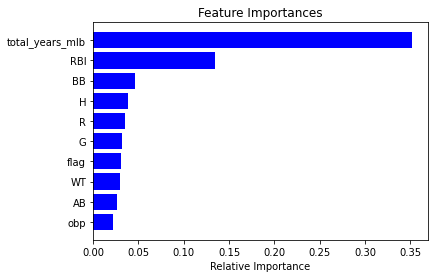

In [9]:
# check Random forest top 10 features
features = X.columns
importances = rfor.feature_importances_
indices = np.argsort(importances)[-10:]  
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## Linear Regression using RandomForest Features Importance 'Features'

In [10]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X_new = X[['total_years_mlb', 'RBI', 'H', 'AB' , 'R', 'Age']]
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('rmse:',rmse, 'R2:',r2)

# check coefficient values 
feat_df = pd.DataFrame({'features': X_new.columns, 'estimatedCoefficients': linreg.coef_})[['features', 'estimatedCoefficients']]
feat_df

rmse: 0.8329836058607364 R2: 0.5536094011914208


,features,estimatedCoefficients
0,total_years_mlb,0.501957
1,RBI,0.297972
2,H,0.125621
3,AB,0.053019
4,R,0.056375
5,Age,0.196034


## RandomForestRegressor with GridSearch

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)

# convert categorical features
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)



# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y
X = pd.concat([X_, dummies], axis=1)
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)


from sklearn.model_selection import GridSearchCV

rand = RandomForestRegressor(random_state=42)
param_grid = {'bootstrap': [True, False],
 'max_depth': [5,10],
 'max_features': ['auto', 'sqrt', 'log2'],
 'n_estimators': [200]}

grid = GridSearchCV(estimator=rand, cv=5, param_grid=param_grid,
                    scoring='neg_mean_squared_error')
grid.fit(X_train_scaled, y_train)
y_pred = grid.predict(X_test_scaled)
y_pred_train = grid.predict(X_train_scaled)
rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print('converted rmse:', rmse)
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

converted rmse: 3510004.775440902
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 200}
Lowest RMSE found:  0.5972618486409366
Train r2 score:  0.8675893984482296
Test r2 score:  0.7823744663487247


# Ridge Regression 

In [12]:
# Ridge Regression with limited features 
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge

X_new = X[['total_years_mlb', 'RBI', 'H', 'BB', 'R', 'G', 'AB', 'Age']]

##Log of Target
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

alpha = [0.0001, 0.001, 0.01, .1, .2]
for val in alpha:
    linreg = Ridge(alpha= val)
    linreg.fit(X_train, y_train)
    pred = linreg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    r2 = r2_score(y_test, pred)
    print('alpha',val,'RMSE', rmse,'R2', r2)

alpha 0.0001 RMSE 0.8139242653156034 R2 0.5738032595910544
alpha 0.001 RMSE 0.8139242653967411 R2 0.5738032595060816
alpha 0.01 RMSE 0.8139242662081206 R2 0.5738032586563533
alpha 0.1 RMSE 0.8139242743219337 R2 0.5738032501590498
alpha 0.2 RMSE 0.8139242833373218 R2 0.5738032407175593


# Lasso Regression

In [13]:
# Lasso Regression with limited features
from sklearn.metrics import r2_score
from sklearn.linear_model import LassoCV

X_new = X[['total_years_mlb', 'RBI', 'H', 'BB', 'R', 'G', 'AB', 'Age']]

## Log of Target
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

eps = [0.0001, 0.001, 0.01, .1]

for val in eps:
    ls = LassoCV(cv=5, eps=val)
    ls.fit(X_train, y_train)
    pred = ls.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test,pred))
    r2 = r2_score(y_test, pred)
    print('alpha',val,'RMSE', rmse,'R2', r2)

alpha 0.0001 RMSE 0.8133715346775258 R2 0.5743819178731773
alpha 0.001 RMSE 0.8125797898087742 R2 0.5752101173065829
alpha 0.01 RMSE 0.872563956404099 R2 0.5101798238598501
alpha 0.1 RMSE 1.0721583607565726 R2 0.2604628339966729


# Linear Regression with PCA

In [14]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#drop useless columns
df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)
#convert categorical variables
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)


# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y.

X = pd.concat([X_, dummies], axis=1)
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#scale data
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=42)


from sklearn.decomposition import PCA
pca = PCA(n_components=7)
model = LinearRegression()

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
y_pred_train = model.predict(X_train_pca)
rmse = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(pred)))

print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
print('Test RMSE:', rmse)


Train r2 score:  0.2013928595128175
Test r2 score:  0.5553746642267432
Test RMSE: 5389542.819377414


(0.0, 10.0)

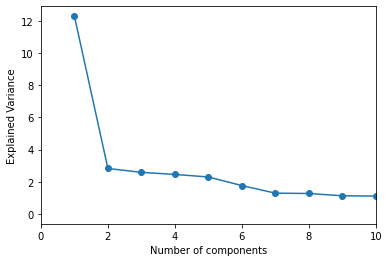

In [15]:
#check for best n_components
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train_scaled)

pca.explained_variance_

plt.plot(np.arange(1,155),
         pca.explained_variance_ , '-o')
plt.xlabel('Number of components')
plt.ylabel('Explained Variance')
plt.xlim(0,10)

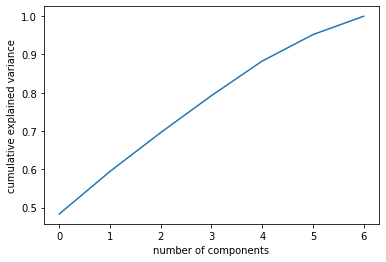

In [16]:
pca = PCA().fit(X_train_pca)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

## Checking for Multicollinearity

In [17]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

/Users/christopher/opt/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [18]:
vif[vif["VIF Factor"] > 5.0]


,VIF Factor,features
1,196.605427,Age
2,141.122436,WT
3,70.529160,G
4,300.676094,AB
5,80.359217,R
6,219.177197,H
7,25.425164,Dbl
9,28.134179,HR
10,60.404968,RBI
13,16.064449,BB


## XGBoost RandomizedSearchCV

In [19]:
#xgboost without scaled dataset
from sklearn.metrics import r2_score
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)


#encode categorical features 
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)


# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y
X = pd.concat([X_, dummies], axis=1)
y = df_hitter_finall.adj_salary_filled
y_log = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

#build model 

xgb_model = xgb.XGBRegressor(n_estimators=1000)
params = {'eta':[0.05, 0.10, 0.15, 0.20, 0.30],
         'max_depth':[2, 3, 5, 7],
         'gamma': [0.0, 0.1, 0.3, 0.5],
         'colsample_bytree': [0.3, 0.5, 0.7],
         'reg_lambda':[0, 0.01, 0.1, 1, 100]}

ran = RandomizedSearchCV(estimator=xgb_model, param_distributions=params, 
                         cv=5, scoring='neg_mean_squared_error', random_state=42)
ran.fit(X_train, y_train)
y_pred = ran.predict(X_test)
y_pred_train = ran.predict(X_train)
rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print(rmse)
print("Best parameters found: ", ran.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(ran.best_score_)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

#check predictions
results_ = pd.DataFrame()
results_['y_pred'] = list(np.exp(y_pred))
results_['y_test'] = list(np.exp(y_test))
results_.round(1)

3389113.641334046
Best parameters found:  {'reg_lambda': 0.01, 'max_depth': 3, 'gamma': 0.5, 'eta': 0.05, 'colsample_bytree': 0.5}
Lowest RMSE found:  0.5839334151608819
Train r2 score:  0.8225357251845548
Test r2 score:  0.7982719235279778


,y_pred,y_test
0,516445.5,540592.3
1,587883.2,554875.3
2,4539854.0,2637984.0
3,969742.8,501451.5
4,587021.6,539962.2
...,...,...
1380,611569.5,555000.0
1381,539383.5,540592.3
1382,445485.0,534488.5
1383,6083279.5,2969792.3


## XGBoost Basic with Feature Importance 

Train r2 score:  0.8968618469632117
Test r2 score:  0.8043053682587793
3315287.0247848034


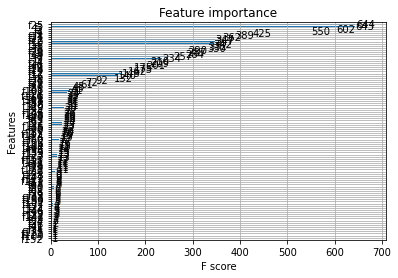

In [20]:
from sklearn.metrics import r2_score
import xgboost as xgb

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)
#encode categorical features 
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)



# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y
X = pd.concat([X_, dummies], axis=1)
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

xgb_model = xgb.XGBRegressor(n_estimators=500, max_depth= 5, gamma=0.1, 
                             eta= 0.05, colsample_bytree= 0.5)

xgb_model.fit(X_train_scaled, y_train)
y_pred_train = xgb_model.predict(X_train_scaled)
y_pred = xgb_model.predict(X_test_scaled)


rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
print(rmse)

#check feature importance 
xgb.plot_importance(xgb_model)
plt.show()


In [21]:
#create feature importance dataframe 
top_feat=pd.DataFrame()
top_feat['columns']=X.columns
top_feat['importances'] = xgb_model.feature_importances_
top_feat.sort_values(by='importances',ascending=False,inplace=True)

results[:20]

,y_pred,y_test
0,5.406040e+05,540592.3
1,5.566427e+05,554875.3
2,5.790094e+06,2637984.0
3,1.344741e+06,501451.5
4,5.638963e+05,539962.2
5,5.698188e+06,6257922.7
6,5.445700e+05,540592.3
7,6.075792e+05,575833.2
8,8.786332e+05,552842.1
9,3.728405e+06,11135177.7


In [22]:
from xgboost import cv

params = { "max_depth":5, 'gamma':0.1, 
                             'eta':0.05, 'colsample_bytree': 0.5}

dset = xgb.DMatrix(X_train_scaled, y_train)
scores = cv(params=params, dtrain=dset, num_boost_round=300, metrics='rmse')
print((scores["test-rmse-mean"]).tail(1))


299    0.578273
Name: test-rmse-mean, dtype: float64


## GradientBoostingRegressor Basic

In [23]:
#Basic GradientBoosting
from sklearn.ensemble import GradientBoostingRegressor                                   
from sklearn.metrics import r2_score

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)
#encode categorical variables 
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)



# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y 
X = pd.concat([X_, dummies], axis=1)
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grad = GradientBoostingRegressor()
grad.fit(X_train, y_train)
y_pred = grad.predict(X_test)
y_pred_train = grad.predict(X_train)


rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
print(rmse)

Train r2 score:  0.7446791655680728
Test r2 score:  0.7911200683706452
3494553.1235677227


## GradientBoostingRegressor and RandomizedSearchCV

In [24]:
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor                                   
from sklearn.model_selection import RandomizedSearchCV

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)
#encode categorical variables
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)


# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y
X = pd.concat([X_, dummies], axis=1)
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {'learning_rate': [0.01],
 'max_depth': [3, 6, 9, None],
 'max_features': ['sqrt', 'log2'],
 'n_estimators': [200,400,500]}
grad = GradientBoostingRegressor(random_state=22)

rands = RandomizedSearchCV(estimator=grad, param_distributions=param_grid, cv=10, scoring='neg_mean_squared_error')
rands.fit(X_train, y_train)
y_pred = rands.predict(X_test)
y_pred_train = rands.predict(X_train)

rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print(rmse)
print("Best parameters found: ", rands.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(rands.best_score_)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

3904990.918571791
Best parameters found:  {'n_estimators': 400, 'max_features': 'log2', 'max_depth': 9, 'learning_rate': 0.01}
Lowest RMSE found:  0.646339318496361
Train r2 score:  0.8088830575961694
Test r2 score:  0.7479969933666473


## LightGBMRegressor 

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

#drop useless columns
df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)
#encode categorical features 
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)


# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X, y
X = pd.concat([X_, dummies], axis=1)
y = df_hitter_finall.adj_salary_filled
y_log = np.log(df_hitter_finall.adj_salary_filled)


X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

#scale data
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

from lightgbm import LGBMRegressor

lgbm = LGBMRegressor(n_estimators=200, max_depth=6, num_leaves=15)
lgbm.fit(X_train_scaled, y_train)
y_pred = lgbm.predict(X_test_scaled)
y_pred_train_ = lgbm.predict(X_train_scaled)

rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))

print(rmse)
print('Train r2 score: ', r2_score(y_pred_train_, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

#check top features
top_feat=pd.DataFrame()
top_feat['columns']=X.columns
top_feat['importances'] = lgbm.feature_importances_
top_feat.sort_values(by='importances',ascending=False,inplace=True)

top_feat[:20]

#check predictions 
results_ = pd.DataFrame()
results_['Predicted'] = list(np.exp(y_pred))
results_['Actual'] = list(np.exp(y_test))
results_.tail(10).round(1)


3236633.8627096354
Train r2 score:  0.8753271859626053
Test r2 score:  0.8003821458146158


,Predicted,Actual
1375,19076500.5,22215589.6
1376,562280.9,563213.0
1377,675649.4,557998.1
1378,640047.2,555556.3
1379,6832035.1,5399622.4
1380,619921.2,555000.0
1381,532092.0,540592.3
1382,491367.7,534488.5
1383,8945658.7,2969792.3
1384,17156686.0,12959093.7


## LightGBMRegressor  with GridSearchCV

In [26]:
from sklearn.metrics import r2_score

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)
#encode categorical variables
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)


# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y 
X = pd.concat([X_, dummies], axis=1)
y = df_hitter_finall.adj_salary_filled
y_log = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[5,6,7],
         'learning_rate': [0.05],
         'n_estimators':[150],
         'colsample_bytree': [0.7, 0.8, 0.9]}


lgbm = LGBMRegressor()

grid= GridSearchCV(estimator=lgbm, param_grid=params, cv=5, 
                   scoring='neg_mean_squared_error')

grid.fit(X_train_scaled, y_train)
y_pred = grid.predict(X_test_scaled)
y_pred_train = grid.predict(X_train_scaled)
rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print(rmse)
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

#check predictions
results = pd.DataFrame()
results['y_pred'] = list(np.exp(y_pred))
results['y_test'] = list(np.exp(y_test))
results.round(1)


3315585.277679865
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 150}
Lowest RMSE found:  0.5709458699752856
Train r2 score:  0.860417582540438
Test r2 score:  0.8004547694201922


,y_pred,y_test
0,536311.4,540592.3
1,574473.2,554875.3
2,3919658.3,2637984.0
3,838628.3,501451.5
4,557276.7,539962.2
...,...,...
1380,615774.1,555000.0
1381,532108.1,540592.3
1382,521052.2,534488.5
1383,8322780.8,2969792.3


## HistGradientBoostingRegressor Basic

In [27]:
from sklearn.metrics import r2_score

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)
#encode categorical variables
dfh_obj = df_hitter_finall.select_dtypes(include=['object']).copy()
dfh_obj.columns
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)


# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y
X = pd.concat([X_, dummies], axis=1)
y = df_hitter_finall.adj_salary_filled
y_log = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor

hist = HistGradientBoostingRegressor()
hist.fit(X_train_scaled, y_train)
y_pred = hist.predict(X_test_scaled)
y_pred_train_ = hist.predict(X_train_scaled)
rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print(rmse)
print('Train r2 score: ', r2_score(y_pred_train_, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

3293081.3990989146
Train r2 score:  0.9040952532098596
Test r2 score:  0.7955884786990999


## HistGradientBoostingRegressor with Grid Search

In [28]:
from sklearn.metrics import r2_score

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)

#encode categorical variables
dummies = pd.get_dummies(df_hitter[['Bats', 'Throws', 'LeagueAbbr', 'posit']], drop_first=True)

# Drop the column with the independent variable (Salary), and columns for which we created dummy variables
X_ = df_hitter_finall.drop(['Bats', 'Throws', 'LeagueAbbr', 'posit', 'adj_salary_filled' ], axis=1).astype('float64')

# Define the feature set X and y 
X = pd.concat([X_, dummies], axis=1)
y = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[None],
         'learning_rate': [0.01, 0.05],
         'max_iter':[500],
         'l2_regularization':[0.1,0.01, 0.001]}


hist = HistGradientBoostingRegressor()

grid= GridSearchCV(estimator=hist, param_grid=params, cv=5, 
                   scoring='neg_mean_squared_error')

grid.fit(X_train_scaled, y_train)
y_pred = grid.predict(X_test_scaled)
y_pred_train = grid.predict(X_train_scaled)
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

Best parameters found:  {'l2_regularization': 0.001, 'learning_rate': 0.05, 'max_depth': None, 'max_iter': 500}
Lowest RMSE found:  0.5729610157892195
Train r2 score:  0.9624426309149887
Test r2 score:  0.8033137834174675


## CatBoostRegressor with GridSearchCV

In [29]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)

#define X and y 
X = df_hitter_finall.drop(columns=['adj_salary_filled'])
y = df_hitter_finall.adj_salary_filled
y_log = np.log(df_hitter_finall.adj_salary_filled)

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)


cat = CatBoostRegressor(cat_features=['Bats', 'Throws', 'LeagueAbbr', 'posit'])

param = {'learning_rate': [0.1],
        'depth': [7,8,9,10],
        'iterations': [400],
        'l2_leaf_reg': [7]}

grid = GridSearchCV(estimator=cat, param_grid=param, cv=5, scoring='neg_mean_squared_error')
grid.fit(X_train, y_train)
y_pred = grid.predict(X_test)
y_pred_train = grid.predict(X_train)
rmse = np.sqrt(mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print(rmse)
print("Best parameters found: ", grid.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(grid.best_score_)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))

# check predictions
results = pd.DataFrame()
results['y_pred'] = list(np.exp(y_pred))
results['y_test'] = list(np.exp(y_test))
results.round(1)

0:	learn: 1.1532795	total: 62.4ms	remaining: 24.9s
1:	learn: 1.0805883	total: 73.8ms	remaining: 14.7s
2:	learn: 1.0170320	total: 80.3ms	remaining: 10.6s
3:	learn: 0.9646266	total: 86.8ms	remaining: 8.6s
4:	learn: 0.9165388	total: 92.6ms	remaining: 7.32s
5:	learn: 0.8754329	total: 98.6ms	remaining: 6.47s
6:	learn: 0.8375436	total: 106ms	remaining: 5.92s
7:	learn: 0.8073529	total: 112ms	remaining: 5.48s
8:	learn: 0.7806528	total: 119ms	remaining: 5.16s
9:	learn: 0.7555464	total: 125ms	remaining: 4.88s
10:	learn: 0.7338227	total: 131ms	remaining: 4.63s
11:	learn: 0.7147349	total: 138ms	remaining: 4.46s
12:	learn: 0.7014606	total: 141ms	remaining: 4.2s
13:	learn: 0.6875371	total: 146ms	remaining: 4.03s
14:	learn: 0.6767265	total: 152ms	remaining: 3.91s
15:	learn: 0.6671112	total: 159ms	remaining: 3.81s
16:	learn: 0.6581849	total: 166ms	remaining: 3.74s
17:	learn: 0.6499281	total: 172ms	remaining: 3.64s
18:	learn: 0.6425517	total: 178ms	remaining: 3.56s
19:	learn: 0.6362298	total: 185ms	rem

,y_pred,y_test
0,534256.1,540592.3
1,585446.9,554875.3
2,4029047.9,2637984.0
3,1003215.2,501451.5
4,562755.7,539962.2
...,...,...
1380,561822.7,555000.0
1381,542075.1,540592.3
1382,504532.1,534488.5
1383,6605701.1,2969792.3


## CatBoostRegressor Basic

In [30]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

df_hitter_finall = df_hitter.drop(columns=['salary', 'borndate', 
                                    'Place', 'playerName', 'HT', 'teamName'], axis=1)

#define X and y 
X = df_hitter_finall.drop(columns=['adj_salary_filled'])
y = df_hitter_finall.adj_salary_filled
y_log = np.log(df_hitter_finall.adj_salary_filled)


X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)

#build model
cat = CatBoostRegressor(iterations=3000, verbose=200, 
                        learning_rate=0.03,loss_function='RMSE',
                        early_stopping_rounds= 200,
                        random_seed=42)
cat.fit(X_train, y_train, cat_features=['Bats', 'Throws', 'LeagueAbbr', 'posit'],  eval_set=(X_test, y_test)
       )
y_pred = cat.predict(X_test)
y_pred_train = cat.predict(X_train)
rmse = np.sqrt(mean_squared_error(np.exp(y_test),np.exp(y_pred)))
print('Train r2 score: ', r2_score(y_pred_train, y_train))
print('Test r2 score: ', r2_score(y_test, y_pred))
print(rmse)

#check top predictions 
top_feat=pd.DataFrame()
top_feat['columns']=X.columns
top_feat['importances'] = cat.feature_importances_
top_feat.sort_values(by='importances',ascending=False,inplace=True)

print(top_feat[:20])
print(cat.get_all_params())


0:	learn: 1.2070486	test: 1.2233823	best: 1.2233823 (0)	total: 4.78ms	remaining: 14.3s
200:	learn: 0.5579210	test: 0.5753949	best: 0.5753949 (200)	total: 1.06s	remaining: 14.7s
400:	learn: 0.5145744	test: 0.5621724	best: 0.5621724 (400)	total: 1.94s	remaining: 12.5s
600:	learn: 0.4762088	test: 0.5542753	best: 0.5542684 (599)	total: 2.76s	remaining: 11s
800:	learn: 0.4464944	test: 0.5502225	best: 0.5502217 (799)	total: 3.65s	remaining: 10s
1000:	learn: 0.4205085	test: 0.5483291	best: 0.5483246 (999)	total: 4.55s	remaining: 9.09s
1200:	learn: 0.3985714	test: 0.5488722	best: 0.5482957 (1010)	total: 5.41s	remaining: 8.11s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.5482956854
bestIteration = 1010

Shrink model to first 1011 iterations.
Train r2 score:  0.8523277919151169
Test r2 score:  0.8065931802104805
3272132.327941746
            columns  importances
29  total_years_mlb    43.250593
0              flag    11.836672
7                 G     5.469442
8           

In [31]:
#check cat predictions 
results = pd.DataFrame()
results['Predicted'] = list(np.exp(y_pred))
results['Actual'] = list(np.exp(y_test))
results.tail(10).round(1)

,Predicted,Actual
1375,17553042.0,22215589.6
1376,517891.7,563213.0
1377,632916.5,557998.1
1378,647116.0,555556.3
1379,6476454.0,5399622.4
1380,587977.2,555000.0
1381,550721.2,540592.3
1382,474645.7,534488.5
1383,6473011.2,2969792.3
1384,14881795.5,12959093.7
